1. 데이터 전처리
2. eda
3. 피처 엔지니어링
4. 스케일링
5. 데이터분할
6. k-fold 교차검증, grid나 randomsearch 사용
7. 데이터증폭 파이프라인 이용해 모델 3가지로 비교 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv('./data/creaditcard_fraud_data.csv')
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [3]:
# 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [4]:
# 결측치 확인
data.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
# 데이터 분포 확인
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
# 사기 거래 횟수 확인하기
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [7]:
9651 / 1852394 * 100

0.5210014716091717

- 사기인 건수 0.5

In [8]:
fraud = data[data['is_fraud'] == 1]
fraud

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
1813949,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
1814016,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
1814204,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1


In [9]:
fraud.groupby('cc_num').size()

cc_num
60416207185             9
60422928733            12
60423098130            10
60427851591            14
60487002085             8
                       ..
4958589671582726883     7
4973530368125489546    10
4980323467523543940    10
4989847570577635369    15
4992346398065154184     8
Length: 976, dtype: int64

In [10]:
data[data['cc_num'] == 340187018810220]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.44,-98.459,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.44,-98.459,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.44,-98.459,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
3580,2019-01-03 01:05:27,340187018810220,fraud_Conroy-Cruickshank,gas_transport,10.76,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.44,-98.459,1595797,Horticultural consultant,1960-10-28,0a2f8002e55a3565c5c88d8cf039fed8,1325552727,28.856712,-97.794207,1
3600,2019-01-03 01:35:52,340187018810220,fraud_Koepp-Parker,grocery_pos,332.35,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.44,-98.459,1595797,Horticultural consultant,1960-10-28,97903213a2fd7e53bbaa60807144a505,1325554552,29.320662,-97.937219,1
3671,2019-01-03 03:17:36,340187018810220,fraud_Strosin-Cruickshank,grocery_pos,315.34,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.44,-98.459,1595797,Horticultural consultant,1960-10-28,0ffc2b7dae4c33883f14ac60283d4027,1325560656,28.953283,-97.806528,1
4744,2019-01-03 23:44:42,340187018810220,"fraud_Moen, Reinger and Murphy",grocery_pos,274.09,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.44,-98.459,1595797,Horticultural consultant,1960-10-28,fdae36d3824101b501a9500505c0dd4c,1325634282,29.789989,-97.996197,1


In [11]:
data['category'].value_counts()

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

<Axes: >

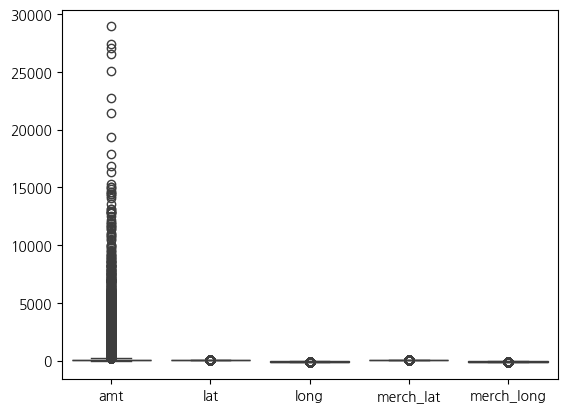

In [12]:
sns.boxplot(data[['amt', 'lat', 'long', 'merch_lat', 'merch_long']])

<Axes: >

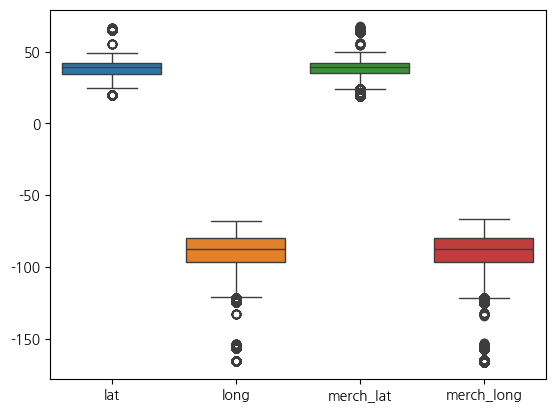

In [13]:
sns.boxplot(data[['lat', 'long', 'merch_lat', 'merch_long']])

In [14]:
data.groupby('category')['amt'].mean()

category
entertainment      64.142968
food_dining        50.994099
gas_transport      63.477271
grocery_net        53.688524
grocery_pos       116.640146
health_fitness     54.087964
home               58.188180
kids_pets          57.527851
misc_net           80.181370
misc_pos           62.676479
personal_care      48.047896
shopping_net       86.941974
shopping_pos       78.906737
travel            111.771158
Name: amt, dtype: float64

In [15]:
data['amt'].describe()

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [16]:
min(data['amt'])

1.0

In [17]:
print(data['amt'].median())
print(data['amt'].mean())

47.45
70.06356747538595


- 이상치를 확인하기 위해 이상치 확인 값을 알아보려 했는데 생각해보니 이상치가 발생했기 때문에 사기로 탐지할 수 있는 건데 없애면 안 될 거라고 생각이 들어 이상치는 그냥 냅두기로

In [18]:
data = data.drop(['street', 'city', 'state', 'zip', 'merchant', 'gender', 'city_pop', 'dob'], axis = 1)
data

,trans_date_trans_time,cc_num,category,amt,first,last,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,Jennifer,Banks,36.0788,-81.1781,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,Stephanie,Gill,48.8878,-118.2105,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,Edward,Sanchez,42.1808,-112.2620,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,Jeremy,White,46.2306,-112.1138,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,Tyler,Garcia,38.4207,-79.4629,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,Michael,Olson,40.4931,-91.8912,Town planner,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,Jose,Vasquez,29.0393,-95.4401,Futures trader,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,Ann,Lawson,46.1966,-118.9017,Musician,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,Eric,Preston,44.6255,-116.4493,Cartographer,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [19]:
data['name'] = data['first'] + ' ' + data['last']
data

,trans_date_trans_time,cc_num,category,amt,first,last,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,name
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,Jennifer,Banks,36.0788,-81.1781,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,Stephanie,Gill,48.8878,-118.2105,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Stephanie Gill
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,Edward,Sanchez,42.1808,-112.2620,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Edward Sanchez
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,Jeremy,White,46.2306,-112.1138,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Jeremy White
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,Tyler,Garcia,38.4207,-79.4629,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tyler Garcia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,Michael,Olson,40.4931,-91.8912,Town planner,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,Michael Olson
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,Jose,Vasquez,29.0393,-95.4401,Futures trader,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,Ann,Lawson,46.1966,-118.9017,Musician,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,Eric,Preston,44.6255,-116.4493,Cartographer,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,Eric Preston


In [20]:
data['name'].nunique()

989

In [21]:
data.groupby('name')['cc_num'].value_counts()

name              cc_num             
Aaron Murray      376028110684021        2920
Aaron Pena        4958589671582726883    2191
Aaron Rogers      4260059589824237        741
Aaron Stewart     4228411452607671        737
Adam Keller       4917226033950           743
                                         ... 
William Thompson  4988304376504          2927
Willie Jordan     213120463918358        1463
Xavier Beltran    349612764943496        2197
Zachary Allen     213195754007681        2196
Zachary Boone     374821819075109         735
Name: count, Length: 999, dtype: int64

In [22]:
data.groupby('name')['long'].value_counts()

name              long     
Aaron Murray      -93.3014     2920
Aaron Pena        -77.2818     2191
Aaron Rogers      -100.6215     741
Aaron Stewart     -69.9576      737
Adam Keller       -86.9920      743
                               ... 
William Thompson  -74.1659     2927
Willie Jordan     -92.5870     1463
Xavier Beltran    -83.5706     2197
Zachary Allen     -92.1354     2196
Zachary Boone     -77.2218      735
Name: count, Length: 999, dtype: int64

In [23]:
data.groupby('name').filter(lambda x: x['lat'].nunique() == 1)

,trans_date_trans_time,cc_num,category,amt,first,last,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,name
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,Jennifer,Banks,36.0788,-81.1781,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,Stephanie,Gill,48.8878,-118.2105,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Stephanie Gill
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,Edward,Sanchez,42.1808,-112.2620,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Edward Sanchez
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,Jeremy,White,46.2306,-112.1138,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Jeremy White
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,Tyler,Garcia,38.4207,-79.4629,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tyler Garcia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,Michael,Olson,40.4931,-91.8912,Town planner,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,Michael Olson
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,Jose,Vasquez,29.0393,-95.4401,Futures trader,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,Ann,Lawson,46.1966,-118.9017,Musician,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,Eric,Preston,44.6255,-116.4493,Cartographer,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,Eric Preston


In [24]:
name_dupli = data.groupby('name').filter(lambda x: x['lat'].nunique() > 1)
name_dupli

,trans_date_trans_time,cc_num,category,amt,first,last,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,name
27,2019-01-01 00:21:32,4334230547694630,misc_pos,6.85,Scott,Martin,43.0172,-111.0292,"Education officer, museum",f3c43d336e92a44fc2fb67058d5949e3,1325377292,43.753735,-111.454923,0,Scott Martin
62,2019-01-01 00:44:20,4433091568498503,grocery_net,75.34,Linda,Davis,39.2335,-77.1458,Clinical biochemist,d6b7e57ba04fbb046f93a87301e493cb,1325378660,38.817293,-77.833468,0,Linda Davis
92,2019-01-01 01:09:57,3502088871723054,grocery_pos,50.57,Scott,Martin,39.0298,-77.0793,Operations geologist,0cf233c92827db6083d311379ad67d46,1325380197,38.394608,-76.437916,0,Scott Martin
190,2019-01-01 02:21:43,30344654314976,grocery_net,41.01,Christine,Johnson,39.8127,-120.6405,Chartered legal executive (England and Wales),ff342d2dad68412cbc24eb27b2370291,1325384503,39.949197,-119.792299,0,Christine Johnson
197,2019-01-01 02:26:16,4334230547694630,gas_transport,49.53,Scott,Martin,43.0172,-111.0292,"Education officer, museum",c09831d3ebf12b67982f193d03162974,1325384776,43.038723,-111.821595,0,Scott Martin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852229,2020-12-31 23:00:19,4158945090781624,home,23.34,Justin,Bell,40.4308,-79.9205,"Scientist, marine",3f4a77e01f8b6f97bdc6b6610b901193,1388530819,40.931560,-80.315443,0,Justin Bell
1852248,2020-12-31 23:05:43,3534330126107879,food_dining,54.91,Jeffrey,Smith,45.2857,-108.9082,Chartered loss adjuster,7c1e586437a823f93bd5961782d9c80f,1388531143,44.503484,-109.722163,0,Jeffrey Smith
1852278,2020-12-31 23:17:34,3534330126107879,home,91.95,Jeffrey,Smith,45.2857,-108.9082,Chartered loss adjuster,fabd9b6be05af0d18a726100b60462c9,1388531854,44.454845,-109.068255,0,Jeffrey Smith
1852337,2020-12-31 23:37:37,4452366298769043,misc_pos,1.58,Linda,Davis,32.0758,-96.7010,Financial adviser,be3ba7799826b14b09c0892acdd8f674,1388533057,33.000167,-97.502968,0,Linda Davis


In [25]:
name_dupli['name'].nunique()

10

In [26]:
data[data['name'] == 'Christine Johnson']['lat'].unique()

array([39.8127, 38.679 ])

- 동명이인이 10개의 케이스가 있다는 것을 확인.
- 동명이인을 구별할 수 있는 건 위도와 경도 데이터가 있으므로 직업 데이터는 삭제 해도 됨

In [27]:
# 직업 데이터 삭제, 삭제하는 김에 first랑 last도 삭제(name이 있기 때문)
data = data.drop(['job', 'first', 'last'], axis = 1)
data

,trans_date_trans_time,cc_num,category,amt,lat,long,trans_num,unix_time,merch_lat,merch_long,is_fraud,name
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,36.0788,-81.1781,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,48.8878,-118.2105,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Stephanie Gill
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,42.1808,-112.2620,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Edward Sanchez
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,46.2306,-112.1138,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Jeremy White
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,38.4207,-79.4629,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tyler Garcia
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,40.4931,-91.8912,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,Michael Olson
1852390,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,29.0393,-95.4401,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,Jose Vasquez
1852391,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,46.1966,-118.9017,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,Ann Lawson
1852392,2020-12-31 23:59:24,4079773899158,travel,7.99,44.6255,-116.4493,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,Eric Preston


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   category               object 
 3   amt                    float64
 4   lat                    float64
 5   long                   float64
 6   trans_num              object 
 7   unix_time              int64  
 8   merch_lat              float64
 9   merch_long             float64
 10  is_fraud               int64  
 11  name                   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 169.6+ MB


In [29]:
data['unix_time'].nunique()

1819583

In [30]:
data['trans_date_trans_time'].nunique()

1819551

- trans_date_trans_time과 unix_time을 비교했을 때 unix_time이 더 많기에 덜 중복이 됐다고 판단해 trans_date_trans_time를 삭제하기로 함

In [31]:
# trans_date_trans_time를 삭제하는 김에 trans_num도 삭제(이유는 각 행이 유니크한 행이다라는 것을 알려주기만 하기 떄문)
data = data.drop(['trans_date_trans_time', 'trans_num'], axis = 1)
data

,cc_num,category,amt,lat,long,unix_time,merch_lat,merch_long,is_fraud,name
0,2703186189652095,misc_net,4.97,36.0788,-81.1781,1325376018,36.011293,-82.048315,0,Jennifer Banks
1,630423337322,grocery_pos,107.23,48.8878,-118.2105,1325376044,49.159047,-118.186462,0,Stephanie Gill
2,38859492057661,entertainment,220.11,42.1808,-112.2620,1325376051,43.150704,-112.154481,0,Edward Sanchez
3,3534093764340240,gas_transport,45.00,46.2306,-112.1138,1325376076,47.034331,-112.561071,0,Jeremy White
4,375534208663984,misc_pos,41.96,38.4207,-79.4629,1325376186,38.674999,-78.632459,0,Tyler Garcia
...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,health_fitness,43.77,40.4931,-91.8912,1388534347,39.946837,-91.333331,0,Michael Olson
1852390,3556613125071656,kids_pets,111.84,29.0393,-95.4401,1388534349,29.661049,-96.186633,0,Jose Vasquez
1852391,6011724471098086,kids_pets,86.88,46.1966,-118.9017,1388534355,46.658340,-119.715054,0,Ann Lawson
1852392,4079773899158,travel,7.99,44.6255,-116.4493,1388534364,44.470525,-117.080888,0,Eric Preston


In [34]:
data['minus_lat'] = data['lat'] - data['merch_lat']
data['minus_long'] = data['long'] - data['merch_long']
data = data.drop(['merch_lat', 'merch_long'], axis = 1)
data

,cc_num,category,amt,lat,long,unix_time,is_fraud,name,minus_lat,minus_long
0,2703186189652095,misc_net,4.97,36.0788,-81.1781,1325376018,0,Jennifer Banks,0.067507,0.870215
1,630423337322,grocery_pos,107.23,48.8878,-118.2105,1325376044,0,Stephanie Gill,-0.271247,-0.024038
2,38859492057661,entertainment,220.11,42.1808,-112.2620,1325376051,0,Edward Sanchez,-0.969904,-0.107519
3,3534093764340240,gas_transport,45.00,46.2306,-112.1138,1325376076,0,Jeremy White,-0.803731,0.447271
4,375534208663984,misc_pos,41.96,38.4207,-79.4629,1325376186,0,Tyler Garcia,-0.254299,-0.830441
...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,health_fitness,43.77,40.4931,-91.8912,1388534347,0,Michael Olson,0.546263,-0.557869
1852390,3556613125071656,kids_pets,111.84,29.0393,-95.4401,1388534349,0,Jose Vasquez,-0.621749,0.746533
1852391,6011724471098086,kids_pets,86.88,46.1966,-118.9017,1388534355,0,Ann Lawson,-0.461740,0.813354
1852392,4079773899158,travel,7.99,44.6255,-116.4493,1388534364,0,Eric Preston,0.154975,0.631588


In [36]:
# 이름 컬럼도 삭제하기
data = data.drop('name', axis = 1)
data

,cc_num,category,amt,lat,long,unix_time,is_fraud,minus_lat,minus_long
0,2703186189652095,misc_net,4.97,36.0788,-81.1781,1325376018,0,0.067507,0.870215
1,630423337322,grocery_pos,107.23,48.8878,-118.2105,1325376044,0,-0.271247,-0.024038
2,38859492057661,entertainment,220.11,42.1808,-112.2620,1325376051,0,-0.969904,-0.107519
3,3534093764340240,gas_transport,45.00,46.2306,-112.1138,1325376076,0,-0.803731,0.447271
4,375534208663984,misc_pos,41.96,38.4207,-79.4629,1325376186,0,-0.254299,-0.830441
...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,health_fitness,43.77,40.4931,-91.8912,1388534347,0,0.546263,-0.557869
1852390,3556613125071656,kids_pets,111.84,29.0393,-95.4401,1388534349,0,-0.621749,0.746533
1852391,6011724471098086,kids_pets,86.88,46.1966,-118.9017,1388534355,0,-0.461740,0.813354
1852392,4079773899158,travel,7.99,44.6255,-116.4493,1388534364,0,0.154975,0.631588


In [58]:
X = data.drop('is_fraud', axis = 1)
y = data['is_fraud']

In [59]:
X = pd.get_dummies(X)
X

,cc_num,amt,lat,long,unix_time,minus_lat,minus_long,category_entertainment,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,454,4.97,36.0788,-81.1781,1325376018,0.067507,0.870215,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,44,107.23,48.8878,-118.2105,1325376044,-0.271247,-0.024038,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,241,220.11,42.1808,-112.2620,1325376051,-0.969904,-0.107519,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,519,45.00,46.2306,-112.1138,1325376076,-0.803731,0.447271,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,377,41.96,38.4207,-79.4629,1325376186,-0.254299,-0.830441,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,215,43.77,40.4931,-91.8912,1388534347,0.546263,-0.557869,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1852390,561,111.84,29.0393,-95.4401,1388534349,-0.621749,0.746533,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1852391,858,86.88,46.1966,-118.9017,1388534355,-0.461740,0.813354,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1852392,85,7.99,44.6255,-116.4493,1388534364,0.154975,0.631588,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [60]:
X['cc_num'].nunique()

999

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()
X['cc_num'] = le.fit_transform(X['cc_num'])
X.head()

,cc_num,amt,lat,long,unix_time,minus_lat,minus_long,category_entertainment,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,454,4.97,36.0788,-81.1781,1325376018,0.067507,0.870215,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,44,107.23,48.8878,-118.2105,1325376044,-0.271247,-0.024038,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,241,220.11,42.1808,-112.2620,1325376051,-0.969904,-0.107519,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,519,45.00,46.2306,-112.1138,1325376076,-0.803731,0.447271,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,377,41.96,38.4207,-79.4629,1325376186,-0.254299,-0.830441,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [63]:
from sklearn.preprocessing import RobustScaler

In [65]:
rs = RobustScaler()
scaled_X = rs.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns = X.columns)
scaled_X

,cc_num,amt,lat,long,unix_time,minus_lat,minus_long,category_entertainment,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-0.082996,-0.578274,-0.450457,0.378534,-1.004709,0.067166,0.868917,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.912955,0.813776,1.311077,-1.846971,-1.004709,-0.271126,-0.024892,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.514170,2.350395,0.388709,-1.489489,-1.004708,-0.968830,-0.108331,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048583,-0.033351,0.945651,-1.480583,-1.004708,-0.802884,0.446183,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.238866,-0.074735,-0.128392,0.481611,-1.004704,-0.254201,-0.830894,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,-0.566802,-0.050095,0.156611,-0.265282,0.996210,0.545269,-0.558458,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1852390,0.133603,0.876531,-1.418552,-0.478558,0.996210,-0.621150,0.745297,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1852391,0.734818,0.536755,0.940975,-1.888510,0.996210,-0.461359,0.812085,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1852392,-0.829960,-0.537163,0.724912,-1.741130,0.996210,0.154515,0.630409,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
from xgboost import XGBClassifier

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [69]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 7)

In [72]:
xgb = XGBClassifier(n_estimators = 1000, n_jobs = 10, max_depth = 5, random_state = 7)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552836
           1       0.91      0.75      0.83      2883

    accuracy                           1.00    555719
   macro avg       0.96      0.88      0.91    555719
weighted avg       1.00      1.00      1.00    555719



### 증폭은 못한 상태